<a href="https://colab.research.google.com/github/va18/Projects/blob/main/leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify the path to your dataset
dataset_path = '/content/drive/MyDrive/leaf_sample'

# Create data generators
datagen = image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 96 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [ ]:
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: healthy and unhealthy
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
3/3 [==============================] - 67s 18s/step - loss: 1.3061 - accuracy: 0.4583 - val_loss: 1.0723 - val_accuracy: 0.4783
Epoch 2/10
3/3 [==============================] - 20s 6s/step - loss: 1.3140 - accuracy: 0.4167 - val_loss: 0.7291 - val_accuracy: 0.5217
Epoch 3/10
3/3 [==============================] - 19s 6s/step - loss: 1.0602 - accuracy: 0.5000 - val_loss: 0.8320 - val_accuracy: 0.5217
Epoch 4/10
3/3 [==============================] - 18s 6s/step - loss: 1.0901 - accuracy: 0.4167 - val_loss: 0.7449 - val_accuracy: 0.4783
Epoch 5/10
3/3 [==============================] - 18s 6s/step - loss: 0.8534 - accuracy: 0.4896 - val_loss: 0.7484 - val_accuracy: 0.4783
Epoch 6/10
3/3 [==============================] - 18s 6s/step - loss: 0.7994 - accuracy: 0.5208 - val_loss: 0.7085 - val_accuracy: 0.4783
Epoch 7/10
3/3 [==============================] - 18s 5s/step - loss: 0.7464 - accuracy: 0.5417 - val_loss: 0.7053 - val_accuracy: 0.4783
Epoch 8/10
3/3 [=================

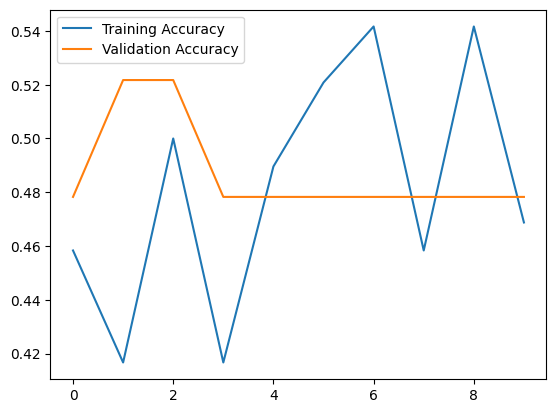

In [ ]:
# Convert dict_keys to a list
keys_list = list(history.history.keys())

# Plot training and validation accuracy if available
if 'accuracy' in keys_list:
    plt.plot(history.history['accuracy'], label='Training Accuracy')

if 'val_accuracy' in keys_list:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()




1/1 [==============================] - 0s 256ms/step


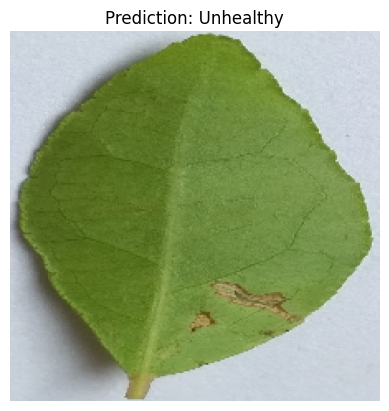

In [ ]:
# Load and preprocess a new image for prediction
img_path = '/content/drive/MyDrive/resize image/Curry_patta2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
# Display the image
plt.imshow(img)
plt.axis('off')

# Display the prediction result
if predictions[0][0] > predictions[0][1]:
    plt.title('Prediction: Healthy')
else:
    plt.title('Prediction: Unhealthy')

plt.show()



In [ ]:
# Assuming three classes: "healthy," "disease_1," and "disease_2"
num_classes = 2

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Three classes: healthy, disease_1, disease_2
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
predictions = model.predict(img_array)
class_names = ["Healthy", "Pest Infestations", "Fungal Diseases"]

predicted_class = class_names[np.argmax(predictions)]
print(f'Prediction: {predicted_class}')


1/1 [==============================] - 2s 2s/step
Prediction: Healthy
